In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_excel('RE_Data.xlsx')

In [3]:
df = df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1)

In [4]:
# Shuffle the DataFrame
df_shuff = df[0:50_000]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
var_columns = [c for c in df_shuff if c not in ['ph','ph_labels']]

X = df_shuff.loc[:,var_columns].values
y = df_shuff.loc[:,'ph'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [8]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
# Create the model
model = KNeighborsRegressor(weights= 'distance', p = 2, n_neighbors= 4, metric='euclidean')

model.fit(X_train, y_train)

# Predict on training and validation sets
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_test)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_valid = mean_squared_error(y_test, y_pred_valid)
rmse_train = np.sqrt(mse_train)
rmse_valid = np.sqrt(mse_valid)
r2_train = r2_score(y_train, y_pred_train)
r2_valid = r2_score(y_test, y_pred_valid)

# Print the evaluation metrics and best hyperparameters
print("KNeighborsRegressor_train R^2 score: {}".format(r2_train))
print("KNeighborsRegressor_valid R^2 score: {}".format(r2_valid))
print("KNeighborsRegressor_train RMSE score: {}".format(rmse_train))
print("KNeighborsRegressor_valid RMSE score: {}".format(rmse_valid))


KNeighborsRegressor_train R^2 score: 1.0
KNeighborsRegressor_valid R^2 score: 0.9990989984831079
KNeighborsRegressor_train RMSE score: 0.0
KNeighborsRegressor_valid RMSE score: 0.008710110654017084


In [9]:
# %timeit 
# %timeit 
model.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=4, weights='distance')

In [10]:
# Make predictions on the training and testing data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

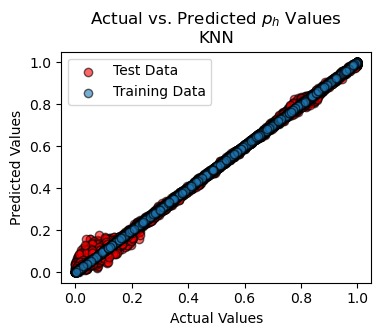

In [11]:
plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred_test, color='r', edgecolors='k', alpha=0.6, label='Test Data')
plt.scatter(y_train, y_pred_train, edgecolors='k', alpha=0.6, label='Training Data')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted $p_h$ Values\nKNN')
plt.legend()
plt.show()


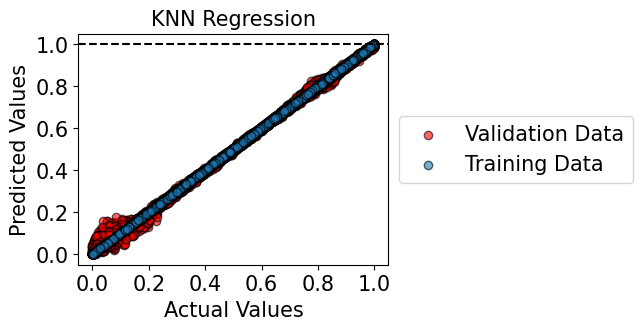

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred_test, color='r', edgecolors='k', alpha=0.6, label='Validation Data')
plt.scatter(y_train, y_pred_train, edgecolors='k', alpha=0.6, label='Training Data')

plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title('KNN Regression', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.axhline(y=1, color='k', linestyle='--', linewidth=1.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)

# plt.tight_layout()  # Ensures the legend is not cut off
plt.show()


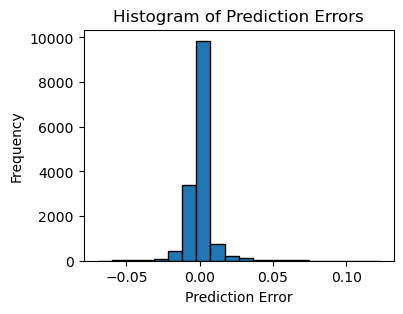

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
plt.hist(y_pred_test - y_test, bins=20, edgecolor='k')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()


In [10]:
import pickle
with open('KNN__re_4_1_45k', 'wb') as file:
    pickle.dump(model, file)

In [10]:
from sklearn.inspection import permutation_importance

# Assuming you have trained a model named 'model' and have X_test and y_test as your test data
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

importances = result.importances_mean

In [11]:
importances

array([0.44242667, 0.68676667, 0.58727333, 0.46636   ])

In [14]:
X

array([[1.01453973, 1.03422478, 1.00536735, 1.01012954],
       [0.99648304, 1.00676816, 0.99611219, 0.99663242],
       [0.97689244, 0.99996001, 0.97513185, 0.97689621],
       ...,
       [0.94227888, 0.97475218, 0.94160997, 0.94282857],
       [1.00002718, 1.0221754 , 0.99267274, 0.99691892],
       [0.98602115, 0.99246708, 0.98594222, 0.98612915]])

In [12]:
# predictions_n = model.predict(X_test)

In [13]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix

# Assuming X and y are your data and labels, and clf is your classifier object
kf = KFold(n_splits=5)
y_pred = cross_val_predict(model, X_test, y_test, cv=kf)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[3789   29    0    0]
 [ 125 3530   46    0]
 [   0   67 3535  117]
 [   0    0   81 3681]]


Text(0.5, 1.0, 'Confusion Matrix ($f_1$)')

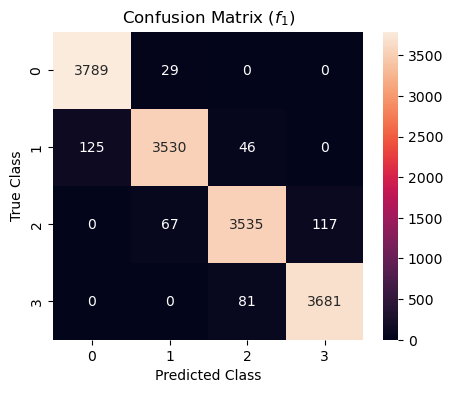

In [14]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# y_true and y_pred are lists or arrays of the true and predicted labels, respectively
plt.figure(figsize=(5,4))
# Create the confusion matrix
# cm = confusion_matrix(y_test, predictions_n)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')

# Add labels to the plot
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix ($f_1$)')
# plt.savefig('Confusion Matrix (Logistic Regression).jpeg',dpi=300)
# Show the plot
# plt.savefig('con_f1.jpeg',dpi=300)

In [15]:
import pickle

# Train your machine learning model and save it to a variable named 'model'

# Save the model to a file named 'model.pkl'
with open('KNN_4_1_45k', 'wb') as file:
    pickle.dump(model, file)

In [16]:
datasize_tr = np.array([700,6500,7000,10500,14000,17500,21000,24500,28000,31500,35000])
datasize_vl = np.array([300,1500,3000,4500,6000,7500,9000,10500,12000,13500,15000])

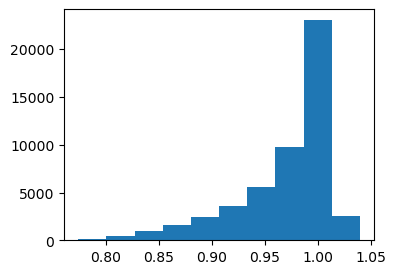

In [17]:
plt.figure(figsize=(4,3))
plt.hist(df.c1.values)
plt.show()

In [18]:
np.max(df.c4.values)

1.027099166574896